## DATASET ANALISIS

In [1]:
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
import tpot
import itertools
import math
import matplotlib.pyplot as plt
from common import load_joint
from visualization import plot_data
pd.set_option('display.max_columns', None)

## Load Dataset

In [2]:
dataset = pd.read_csv("dataset/data-final.csv", sep='\t')
dataset.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


## Clean the data

In [3]:
col_times = filter(lambda x: x.find("_E") != -1, list(dataset.columns))
dataset_clean = load_joint(n_samples=1_000000)

This data was collected (2016-2018) through an interactive on-line personality test.
The personality test was constructed with the "Big-Five Factor Markers" from the IPIP. https://ipip.ori.org/newBigFive5broadKey.htm. These factors are:
 - Factor I (Surgency or Extraversion)
 - Factor II (Agreeableness)
 - Factor III (Conscientiousness)
 - Factor IV (Emotional Stability)
 - Factor V (Intellect or Imagination)

The following items were presented on one page and each was rated on a five point scale using radio buttons. The order on page was was EXT1, AGR1, CSN1, EST1, OPN1, EXT2, etc.
The scale was labeled 1=Disagree, 3=Neutral, 5=Agree (categorical feature). Although in original dataset we had more information, like time spend on each question, dimensions of user's screen size, timestamps and approximated latitude/longitude of user, we decided to select most useful, columns that are enumerated below: 

    COLUMN  QUESTION
    EXT1	I am the life of the party.
    EXT2	I don't talk a lot.
    EXT3	I feel comfortable around people.
    EXT4	I keep in the background.
    EXT5	I start conversations.
    EXT6	I have little to say.
    EXT7	I talk to a lot of different people at parties.
    EXT8	I don't like to draw attention to myself.
    EXT9	I don't mind being the center of attention.
    EXT10	I am quiet around strangers.
    EST1	I get stressed out easily.
    EST2	I am relaxed most of the time.
    EST3	I worry about things.
    EST4	I seldom feel blue.
    EST5	I am easily disturbed.
    EST6	I get upset easily.
    EST7	I change my mood a lot.
    EST8	I have frequent mood swings.
    EST9	I get irritated easily.
    EST10	I often feel blue.
    AGR1	I feel little concern for others.
    AGR2	I am interested in people.
    AGR3	I insult people.
    AGR4	I sympathize with others' feelings.
    AGR5	I am not interested in other people's problems.
    AGR6	I have a soft heart.
    AGR7	I am not really interested in others.
    AGR8	I take time out for others.
    AGR9	I feel others' emotions.
    AGR10	I make people feel at ease.
    CSN1	I am always prepared.
    CSN2	I leave my belongings around.
    CSN3	I pay attention to details.
    CSN4	I make a mess of things.
    CSN5	I get chores done right away.
    CSN6	I often forget to put things back in their proper place.
    CSN7	I like order.
    CSN8	I shirk my duties.
    CSN9	I follow a schedule.
    CSN10	I am exacting in my work.
    OPN1	I have a rich vocabulary.
    OPN2	I have difficulty understanding abstract ideas.
    OPN3	I have a vivid imagination.
    OPN4	I am not interested in abstract ideas.
    OPN5	I have excellent ideas.
    OPN6	I do not have a good imagination.
    OPN7	I am quick to understand things.
    OPN8	I use difficult words.
    OPN9	I spend time reflecting on things.
    OPN10	I am full of ideas.
    country     The country, determined by technical information (NOT ASKED AS A QUESTION)
    
We decided to normalize column "country", and aggregate all countries with samples ammount below 1000 to one label "OTHER".

In [4]:
dataset_clean

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
893833,2.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,4.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0,5.0,2.0,3.0,1.0,5.0,4.0,4.0,3.0,BR
789852,4.0,2.0,4.0,1.0,4.0,2.0,4.0,1.0,5.0,2.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,1.0,4.0,2.0,5.0,1.0,5.0,1.0,4.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,3.0,4.0,2.0,3.0,2.0,4.0,2.0,4.0,4.0,2.0,2.0,2.0,US
643825,4.0,3.0,3.0,3.0,2.0,3.0,1.0,3.0,3.0,5.0,5.0,2.0,4.0,1.0,4.0,5.0,5.0,5.0,5.0,4.0,2.0,5.0,4.0,5.0,2.0,5.0,2.0,2.0,5.0,3.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,US
119343,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,0.0,1.0,2.0,5.0,4.0,3.0,3.0,0.0,3.0,1.0,1.0,3.0,1.0,5.0,1.0,5.0,1.0,1.0,1.0,5.0,5.0,5.0,4.0,2.0,5.0,1.0,3.0,3.0,4.0,1.0,4.0,4.0,0.0,1.0,5.0,1.0,5.0,1.0,5.0,4.0,5.0,5.0,US
645937,3.0,3.0,4.0,2.0,5.0,3.0,4.0,5.0,2.0,4.0,4.0,3.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,2.0,4.0,4.0,1.0,3.0,2.0,3.0,2.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,2.0,4.0,4.0,4.0,2.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,1.0,4.0,3.0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447605,4.0,2.0,4.0,2.0,3.0,1.0,2.0,2.0,5.0,4.0,4.0,4.0,5.0,2.0,2.0,4.0,5.0,5.0,4.0,5.0,1.0,5.0,4.0,5.0,1.0,3.0,1.0,4.0,5.0,4.0,3.0,1.0,5.0,4.0,3.0,5.0,3.0,3.0,2.0,3.0,5.0,2.0,5.0,1.0,4.0,1.0,5.0,5.0,5.0,5.0,US
306885,1.0,5.0,2.0,5.0,3.0,4.0,2.0,4.0,2.0,5.0,5.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,5.0,4.0,1.0,3.0,1.0,5.0,2.0,4.0,2.0,4.0,5.0,4.0,3.0,4.0,5.0,2.0,2.0,2.0,4.0,4.0,5.0,4.0,5.0,2.0,5.0,2.0,4.0,2.0,4.0,3.0,5.0,4.0,US
491990,4.0,1.0,4.0,3.0,5.0,1.0,4.0,3.0,3.0,3.0,5.0,3.0,5.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,3.0,5.0,2.0,4.0,3.0,5.0,2.0,5.0,4.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,3.0,5.0,4.0,3.0,3.0,5.0,1.0,5.0,2.0,3.0,2.0,5.0,5.0,US
20612,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,4.0,5.0,5.0,2.0,5.0,3.0,1.0,5.0,5.0,4.0,5.0,5.0,3.0,2.0,4.0,3.0,3.0,5.0,5.0,3.0,4.0,1.0,3.0,4.0,5.0,2.0,5.0,2.0,5.0,2.0,2.0,5.0,5.0,1.0,1.0,1.0,0.0,5.0,5.0,4.0,1.0,3.0,TR


## Basic analise

In tables below, we can get detailed information about measures like "mean", "std" and percentiles: 25%, 50%(median) and 75%. For entire set, mean is roughly 3.118 and standard deviation about 1.358.

In [5]:
dataset_clean.iloc[:,:-1].stack().mean()

3.118403741759304

In [6]:
dataset_clean.iloc[:,:-1].stack().std()

1.3576367692493534

In [11]:
dataset_clean.iloc[:, :10].describe(include='all')

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10
count,998246.000000,998246.000000,998246.000000,998246.000000,998246.000000,998246.000000,998246.000000,998246.000000,998246.000000,998246.000000
mean,2.648047,2.773058,3.288335,3.140377,3.276901,2.401055,2.771634,3.414708,2.963768,3.556336
std,1.264609,1.323924,1.215100,1.237680,1.277646,1.225838,1.400401,1.272004,1.346221,1.305382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [50]:
dataset_clean.iloc[:, :10].stack().mean()

3.023421982156703

In [51]:
dataset_clean.iloc[:, :10].stack().std()

1.3354370524652253

In [12]:
dataset_clean.iloc[:, 20:30].describe(include='all')

,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10
count,998246.000000,998246.000000,998246.000000,998246.000000,998246.000000,998246.000000,998246.000000,998246.000000,998246.000000,998246.000000
mean,2.255429,3.830975,2.259821,3.927232,2.270926,3.742987,2.196019,3.689276,3.788926,3.592328
std,1.340037,1.140596,1.277230,1.127999,1.171354,1.222502,1.120449,1.095510,1.166799,1.080766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,3.000000,3.000000
50%,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,4.000000,4.000000
75%,3.000000,5.000000,3.000000,5.000000,3.000000,5.000000,3.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [56]:
dataset_clean.iloc[:,20:30].stack().mean()

3.1553918573177353

In [57]:
dataset_clean.iloc[:,20:30].stack().std()

1.3943218524837724

In [13]:
dataset_clean.iloc[:, 30:40].describe(include='all')

,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10
count,998246.000000,998246.000000,998246.000000,998246.000000,998246.000000,998246.000000,998246.000000,998246.000000,998246.000000,998246.000000
mean,3.298102,2.929775,3.975188,2.617768,2.625849,2.831836,3.698025,2.465200,3.200703,3.590716
std,1.176747,1.389995,1.044856,1.251911,1.274609,1.416200,1.128050,1.140918,1.276215,1.053172
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,4.000000,2.000000,3.000000,3.000000,4.000000,2.000000,3.000000,4.000000
75%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [54]:
dataset_clean.iloc[:,30:40].stack().mean()

3.123316196608852

In [55]:
dataset_clean.iloc[:,30:40].stack().std()

1.314827565372733

In [14]:
dataset_clean.iloc[:, 40:].describe(include='all')

,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
count,998246.000000,998246.000000,998246.000000,998246.000000,998246.000000,998246.000000,998246.000000,998246.000000,998246.000000,998246.000000,999924
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,538236
mean,3.654417,2.075952,4.000019,2.000017,3.792896,1.894640,3.976338,3.182335,4.123121,3.958467,NaN
std,1.157346,1.112581,1.097113,1.090297,0.992408,1.104165,1.008642,1.255426,1.040976,1.034508,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,4.000000,3.000000,NaN
50%,4.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,3.000000,4.000000,4.000000,NaN
75%,5.000000,3.000000,5.000000,3.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000,NaN


In [58]:
dataset_clean.iloc[:,40:-1].stack().mean()

3.265820248716248

In [59]:
dataset_clean.iloc[:,40:-1].stack().std()

1.396910811029765

## Correlations between questions

As we can see below, all columns, except "country", are float64. All features are categorical.

In [15]:
corrAll = dataset_clean.iloc[:, :].corr()
corr1 = dataset_clean.iloc[:, :10].corr()
corr2 = dataset_clean.iloc[:, 10:20].corr()
corr3 = dataset_clean.iloc[:, 20:30].corr()
corr4 = dataset_clean.iloc[:, 30:40].corr()
corr5 = dataset_clean.iloc[:, 40:].corr()
corr6 = dataset_clean.iloc[:, 30:50].corr()
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 485151 to 736516
Data columns (total 51 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   EXT1     998246 non-null  float64
 1   EXT2     998246 non-null  float64
 2   EXT3     998246 non-null  float64
 3   EXT4     998246 non-null  float64
 4   EXT5     998246 non-null  float64
 5   EXT6     998246 non-null  float64
 6   EXT7     998246 non-null  float64
 7   EXT8     998246 non-null  float64
 8   EXT9     998246 non-null  float64
 9   EXT10    998246 non-null  float64
 10  EST1     998246 non-null  float64
 11  EST2     998246 non-null  float64
 12  EST3     998246 non-null  float64
 13  EST4     998246 non-null  float64
 14  EST5     998246 non-null  float64
 15  EST6     998246 non-null  float64
 16  EST7     998246 non-null  float64
 17  EST8     998246 non-null  float64
 18  EST9     998246 non-null  float64
 19  EST10    998246 non-null  float64
 20  AGR1     998246 non-

We used heat map, to visualize all correlations between question. On main heat map from entire set, we can notice five main areas of correlations (especially big correlations are in Extraversion(EXT) column). These areas cover each five questions category, which confirms theory about Big Five Factor Markers. We can notice (much smaller) correlations between specific groups. There is significant connection between columns Extraversion(EXT) and Agreeableness(AGR), which seems logic, because both depends on similiar character traits (for example self-confidence).

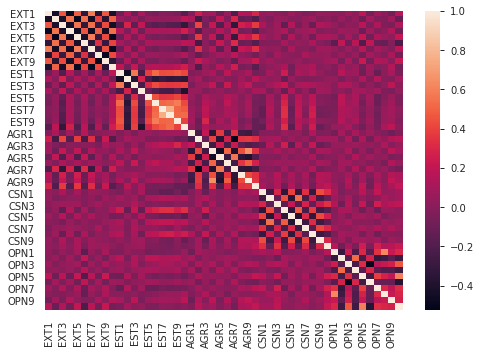

In [16]:
sns.heatmap(
    corrAll,
)

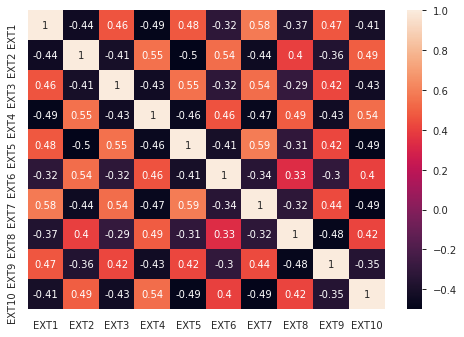

In [17]:
sns.heatmap(
    corr1, annot=True
)

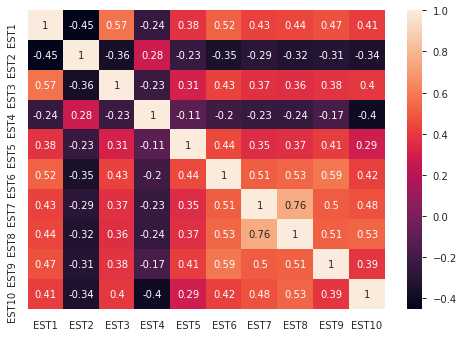

In [18]:
sns.heatmap(
    corr2, annot=True
)

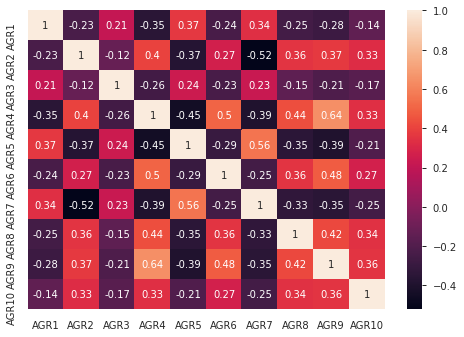

In [19]:
sns.heatmap(
    corr3, annot=True
)

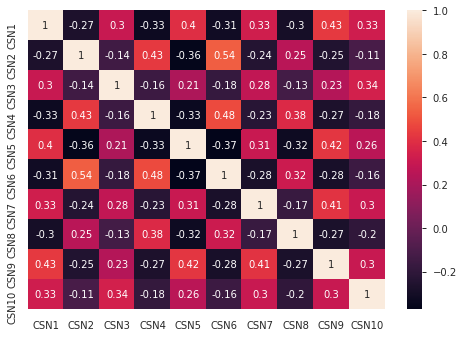

In [20]:
sns.heatmap(
    corr4, annot=True
)

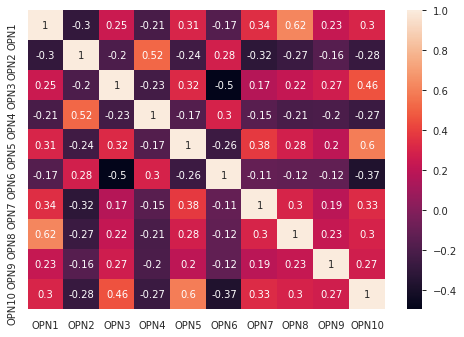

In [21]:
sns.heatmap(
    corr5, annot=True
)

## Answers histograms

Below there are histograms of answers, which visualizes different Categorical distributions. Generally, most of these histograms would be also well described by Gauss distribution.

/home/janek/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/janek/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


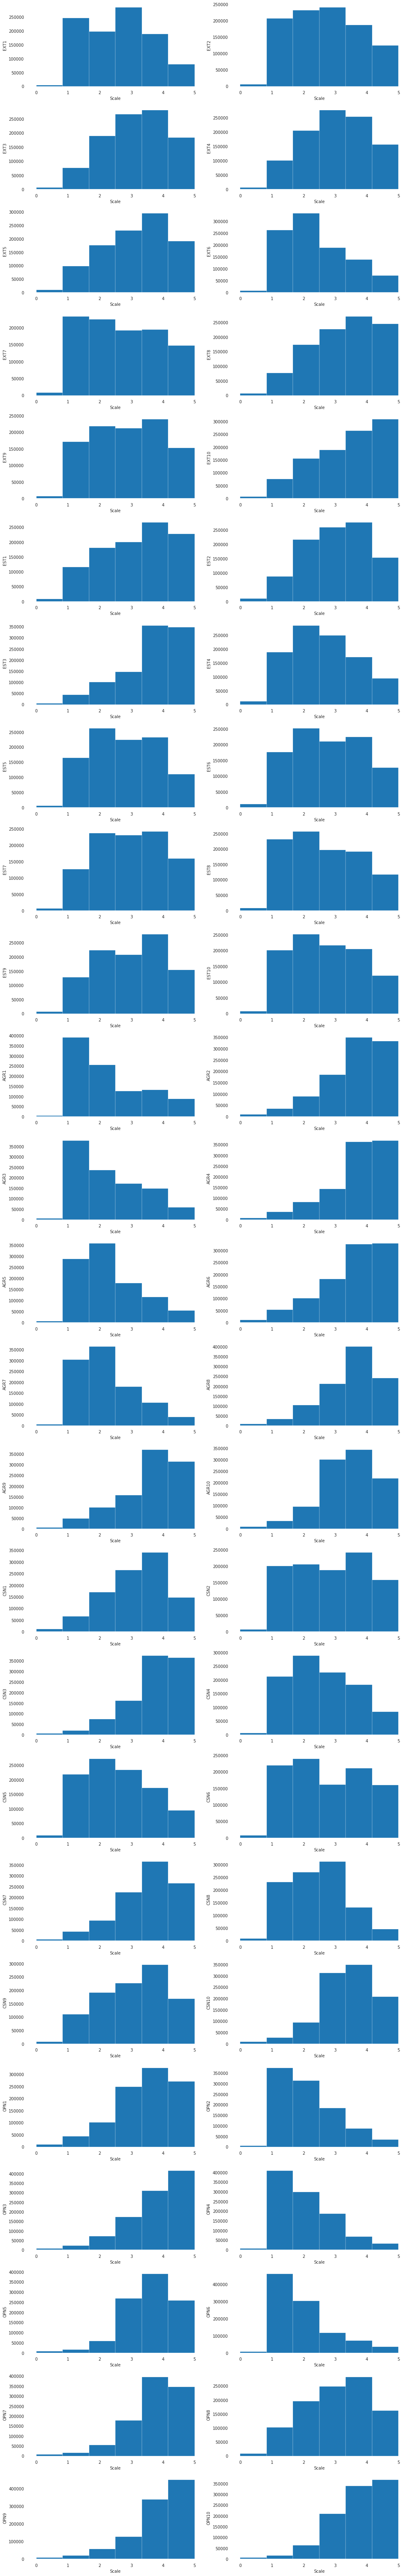

In [22]:
sub_columns = dataset_clean.columns[:-1]
fig, ax_all = plt.subplots(math.ceil(len(sub_columns)/2), 2, figsize=(14,3.5*math.ceil(len(sub_columns)/2)))
for i, col in enumerate(sub_columns):
    # Set up the plot
    ax = ax_all[math.floor(i/2),i%2]
    # Draw the plot
    ax.hist(dataset_clean[col], bins=6)

    # Title and labels
    ax.set_xlabel("Scale", size = 10)
    ax.set_ylabel(col, size= 10)
    plt.tight_layout()



Below there is one more table and histogram, which represnts nationality distribution of test's participants. As we can see, most tests were filled by Americans.

In [67]:
dataset_clean.groupby("country").count()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
country,,,,,,,,,,,,,,,,,,,,,
AE,3007,3007,3007,3007,3007,3007,3007,3007,3007,3007,...,3007,3007,3007,3007,3007,3007,3007,3007,3007,3007
AR,3091,3091,3091,3091,3091,3091,3091,3091,3091,3091,...,3091,3091,3091,3091,3091,3091,3091,3091,3091,3091
AT,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,...,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184
AU,48993,48993,48993,48993,48993,48993,48993,48993,48993,48993,...,48993,48993,48993,48993,48993,48993,48993,48993,48993,48993
BE,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,...,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748
BG,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,...,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251
BR,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152,...,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152
CA,60800,60800,60800,60800,60800,60800,60800,60800,60800,60800,...,60800,60800,60800,60800,60800,60800,60800,60800,60800,60800
CH,3058,3058,3058,3058,3058,3058,3058,3058,3058,3058,...,3058,3058,3058,3058,3058,3058,3058,3058,3058,3058


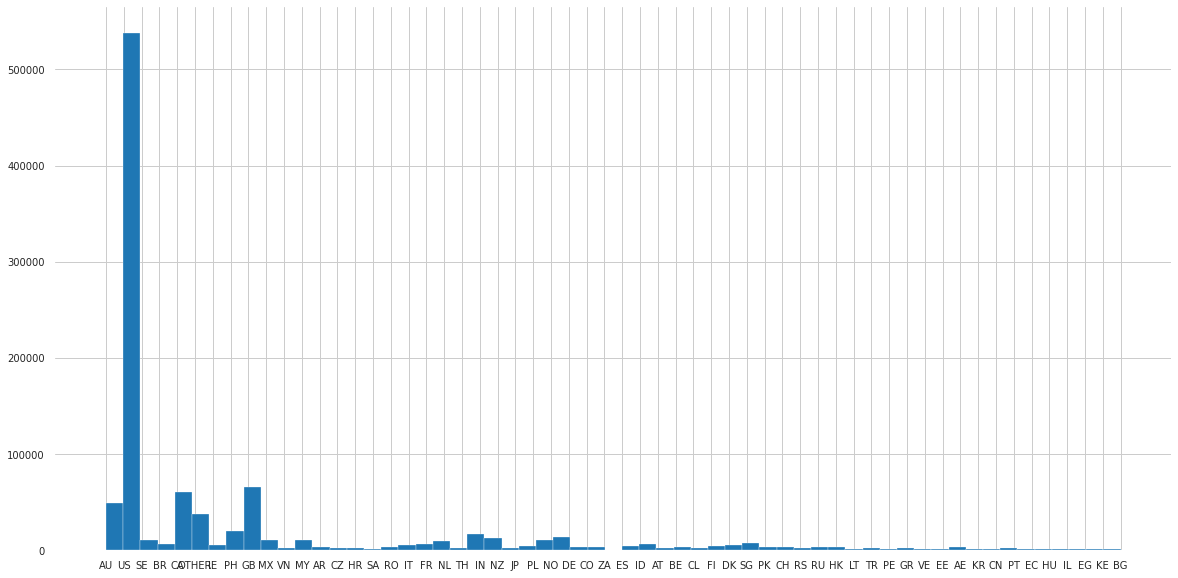

In [23]:
dataset_clean.iloc[:, -1].hist(bins=59, figsize = (20,10))

# International comparison
A quick comparison of answers between american and polish users. We want to mention, that there is big difference in data sizes. There is 537755 tests from USA and only 4586 from Poland. Smaller ammount of samples from Poland may have influence in results.

In [61]:
dataset_comp = dataset_clean[dataset_clean['country'].isin(["US", "PL"])]
dataset_comp.groupby("country").count()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
country,,,,,,,,,,,,,,,,,,,,,
PL,4586,4586,4586,4586,4586,4586,4586,4586,4586,4586,...,4586,4586,4586,4586,4586,4586,4586,4586,4586,4586
US,537755,537755,537755,537755,537755,537755,537755,537755,537755,537755,...,537755,537755,537755,537755,537755,537755,537755,537755,537755,537755


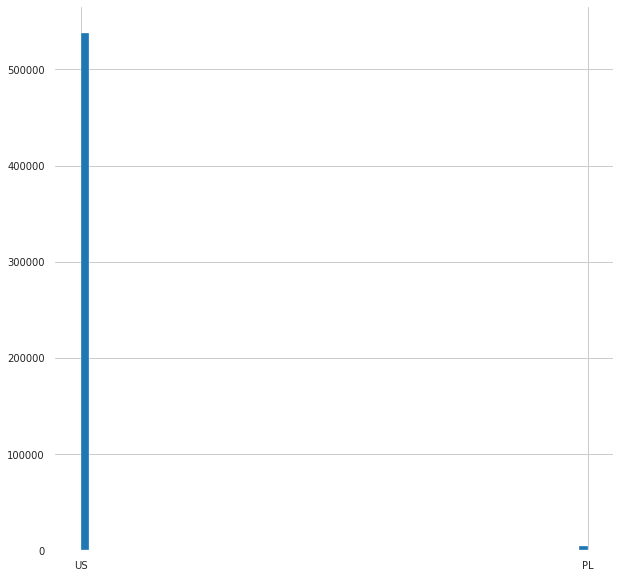

In [65]:
dataset_comp.iloc[:, -1].hist(bins=59, figsize = (10,10))

In [62]:
def compare_answers(dataset, a, b):
    sub_columns = dataset.columns[a:b]
    for i, col in enumerate(sub_columns):
        dataset[col].hist(by=dataset['country'], bins=6)
        # Title and labels
        plt.ylabel(col)

Results of comparison in category "Surgency or Extraversion":

        EXT1    I am the life of the party. - USA SCORED HIGHER
        EXT2    I don't talk a lot. - POLAND SCORED HIGHER
        EXT3    I feel comfortable around people. - USA SCORED HIGHER
        EXT4    I keep in the background. - POLAND SCORED HIGHER
        EXT5    I start conversations. - USA SCORED HIGHER
        EXT6    I have little to say. - SIMILAR 
        EXT7    I talk to a lot of different people at parties. - USA SCORED HIGHER
        EXT8    I don't like to draw attention to myself. - SIMILAR
        EXT9    I don't mind being the center of attention. - SIMILAR
        EXT10   I am quiet around strangers. - SIMILAR
        
In this category, Americans seems to be much more open than Polish people.

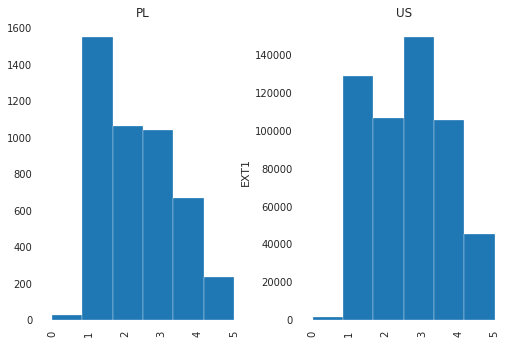

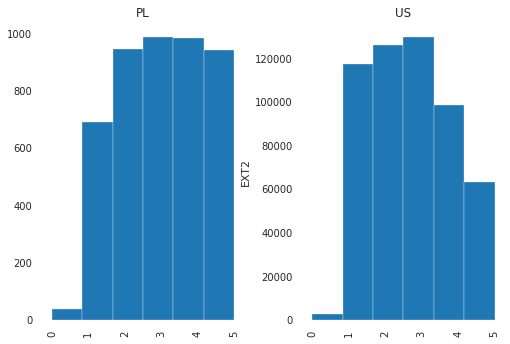

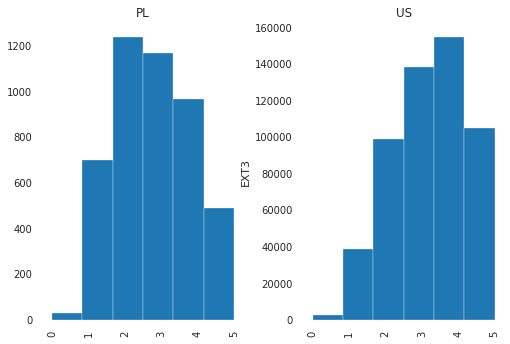

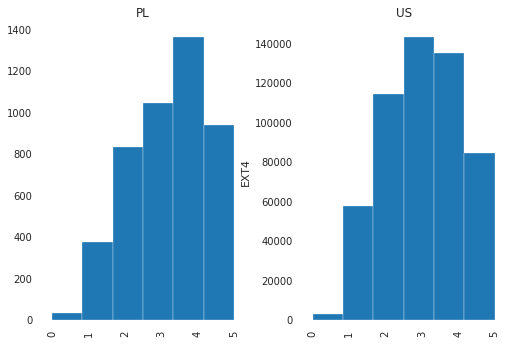

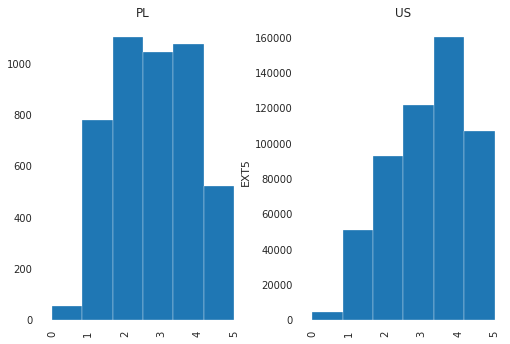

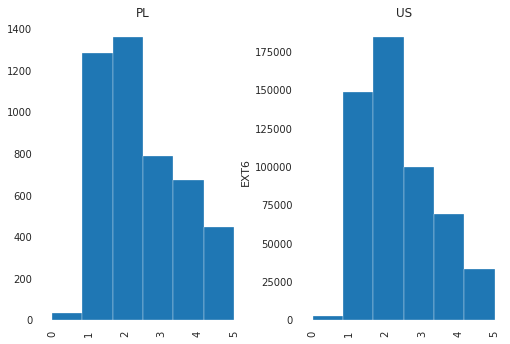

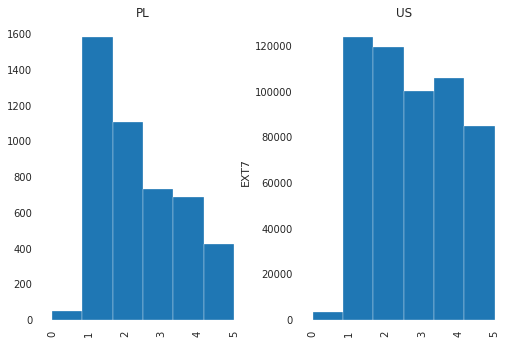

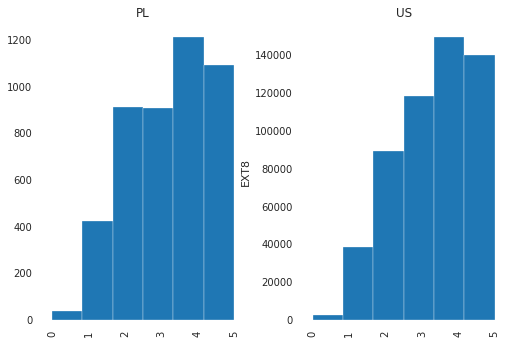

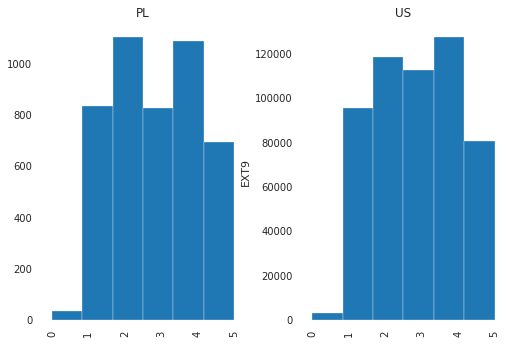

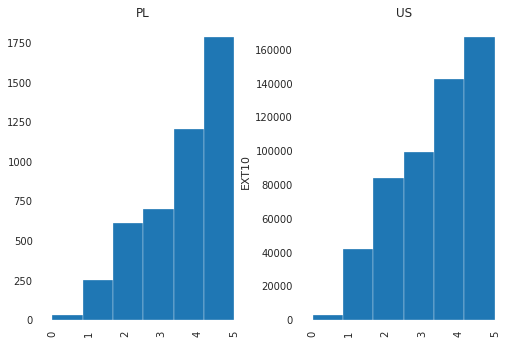

In [28]:
compare_answers(dataset_comp,0,10)


Results of comparison in category "Emotional Stability":

        EST1    I get stressed out easily. - SIMILAR
        EST2    I am relaxed most of the time. - USA SCORED HIGHER
        EST3    I worry about things. - SIMILAR
        EST4    I seldom feel blue. - SIMILAR
        EST5    I am easily disturbed. - POLAND SCORED HIGHER
        EST6    I get upset easily. - POLAND SCORED HIGER
        EST7    I change my mood a lot. - POLAND SCORED HIGHER
        EST8    I have frequent mood swings. - POLAND SCORED HIGHER
        EST9    I get irritated easily. - SIMILAR
        EST10    I often feel blue. - POLAND SCORED HIGHER
        
In this category, Polish people seems to be more emotional and to feel sad more frequently than Americans.

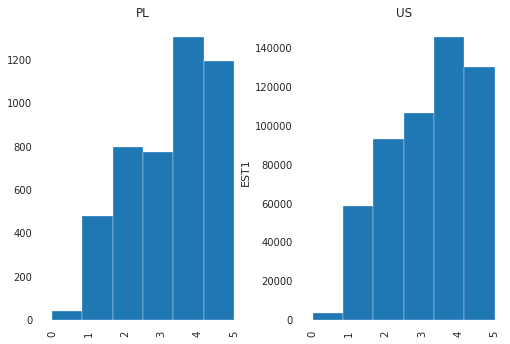

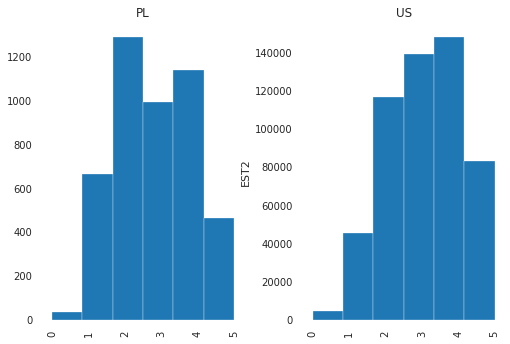

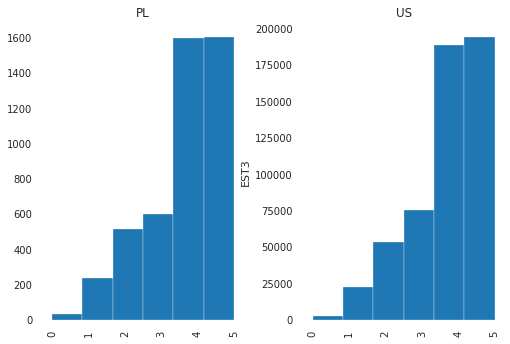

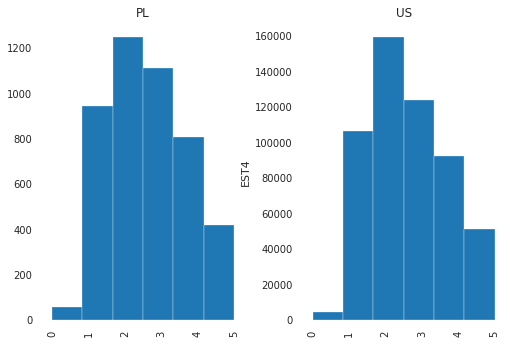

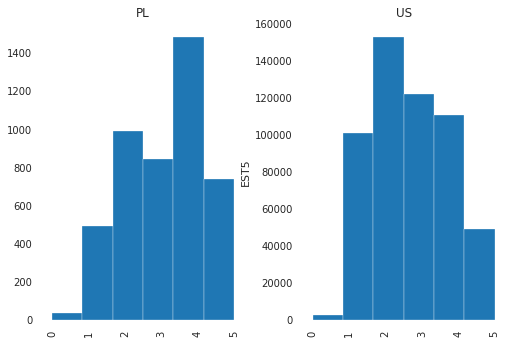

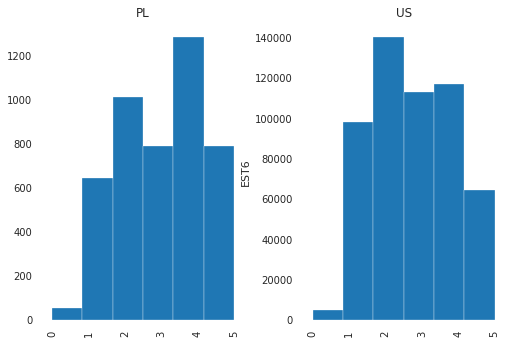

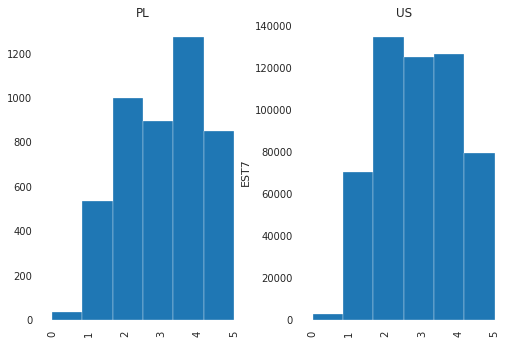

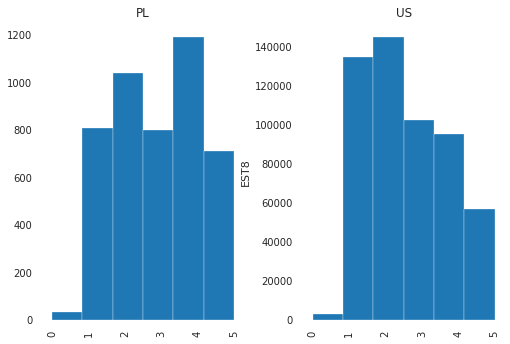

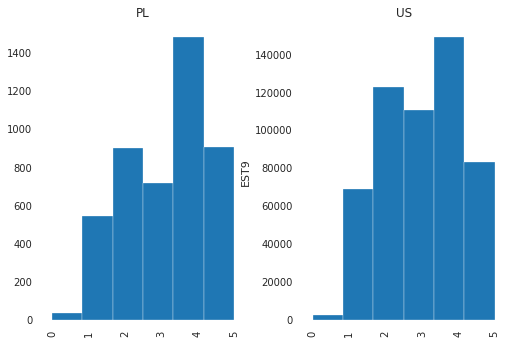

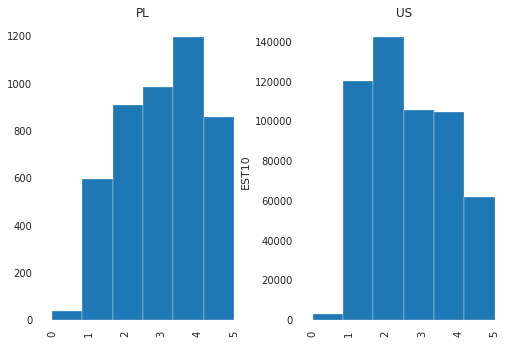

In [29]:
compare_answers(dataset_comp,10,20)

Results of comparison in category "Agreeableness":

        AGR1	I feel little concern for others. - POLAND SCORED (MUCH) HIGHER
        AGR2	I am interested in people. - USA SCORED HIGHER
        AGR3	I insult people. - POLAND SCORED HIGHER
        AGR4	I sympathize with others' feelings. - USA SCORED (MUCH) HIGHER
        AGR5	I am not interested in other people's problems. - POLAND SCORED HIGHER
        AGR6	I have a soft heart. - USA SCORED HIGHER
        AGR7	I am not really interested in others. - POLAND SCORED HIGER 
        AGR8	I take time out for others. - USA SCORED HIGHER
        AGR9	I feel others' emotions. - USA SCORED HIGHER
        AGR10	I make people feel at ease. - USA SCORED HIGHER
        
In this category, USA people looks to be more emphatic than Polish people.

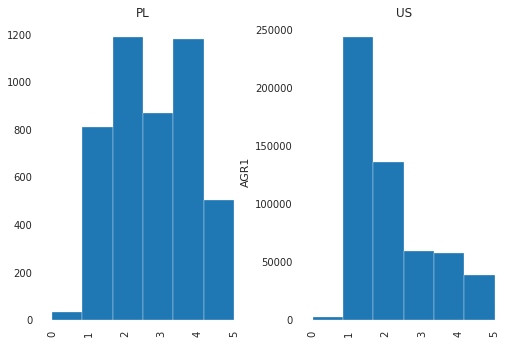

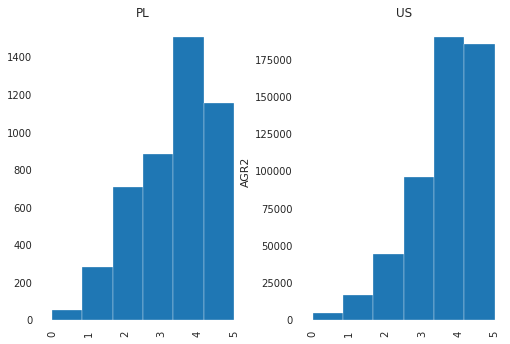

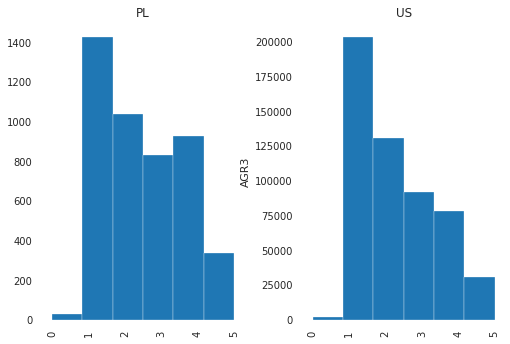

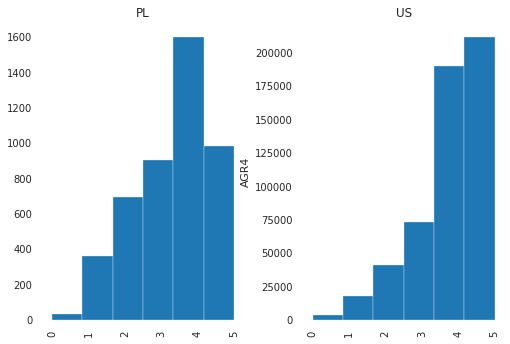

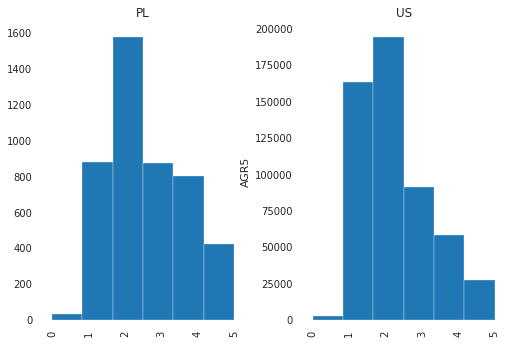

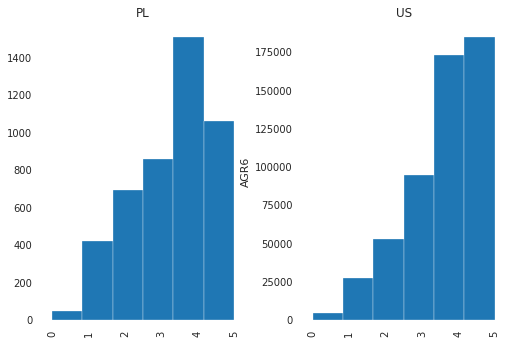

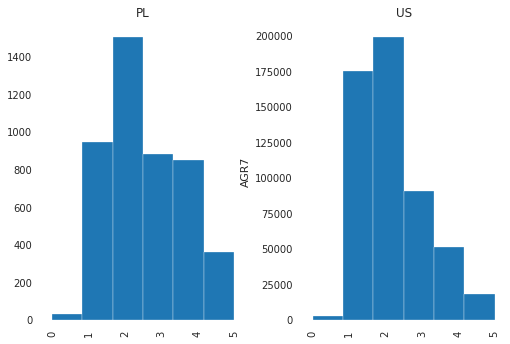

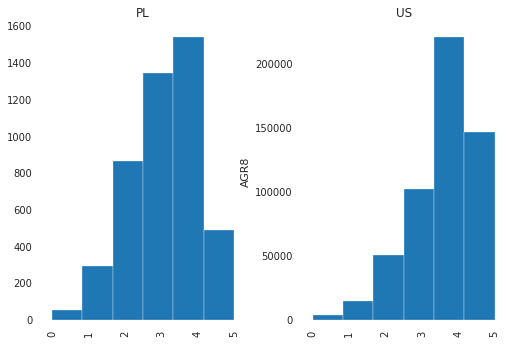

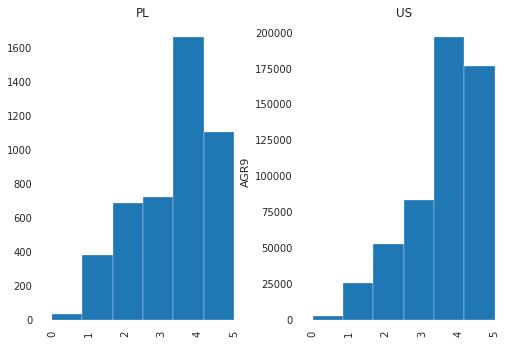

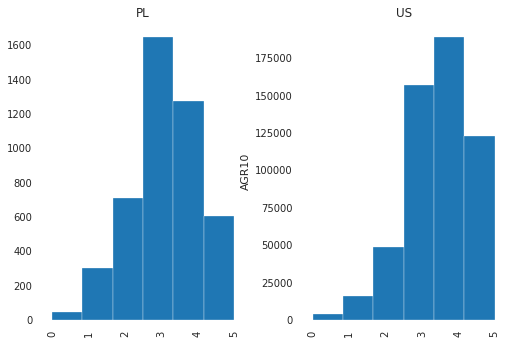

In [30]:
compare_answers(dataset_comp,20,30)

Results of comparison in category "Conscientiousness":
 
        CSN1	I am always prepared. - SIMILAR
        CSN2	I leave my belongings around. - SIMILAR
        CSN3	I pay attention to details. - SIMILAR
        CSN4	I make a mess of things. - POLAND SCORE HIGHER
        CSN5	I get chores done right away. - USA SCORED HIGHER
        CSN6	I often forget to put things back in their proper place. - POLAND SCORED HIGHER
        CSN7	I like order. - USA SCORED HIGHER
        CSN8	I shirk my duties. - POLAND SCORED HIGHER
        CSN9	I follow a schedule. - USA SCORED HIGHER
        CSN10	I am exacting in my work. - SIMILAR
        
In this category, USA people looks to be a little better organised than Polish people.

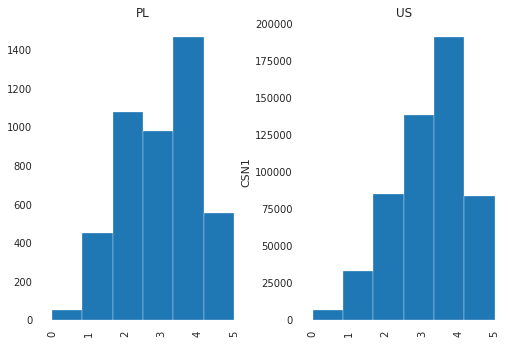

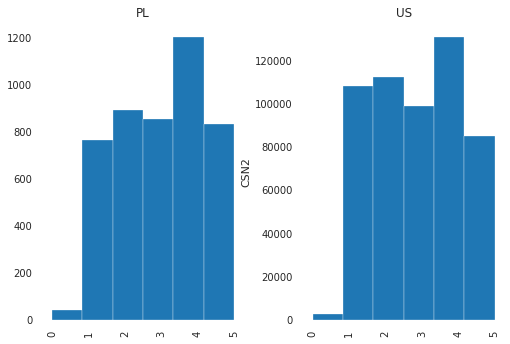

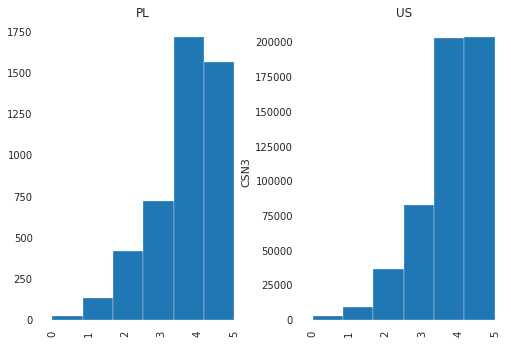

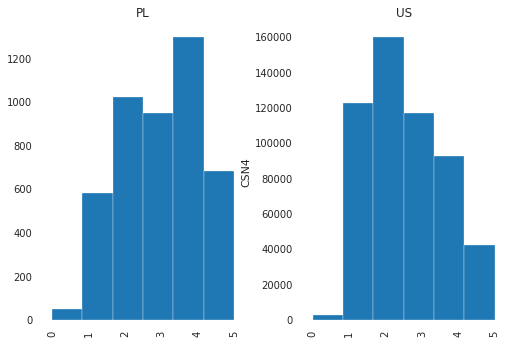

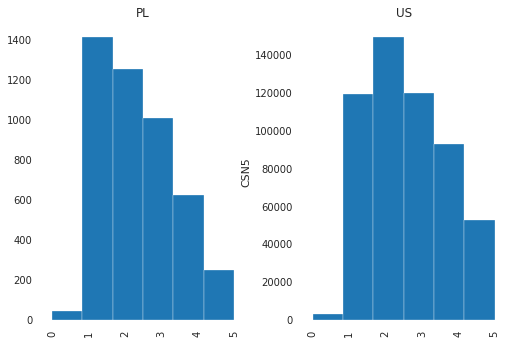

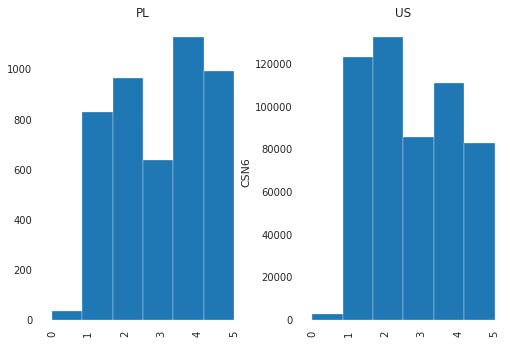

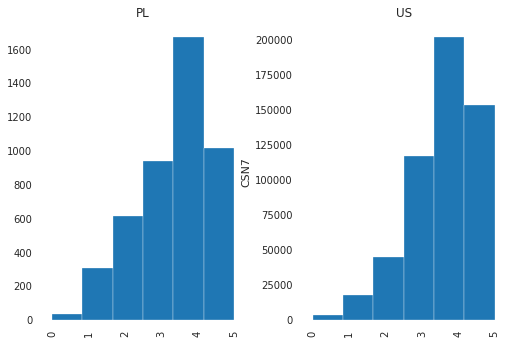

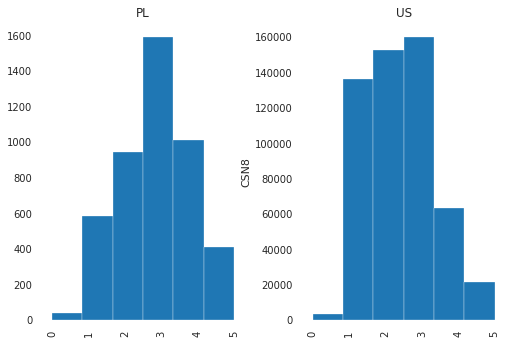

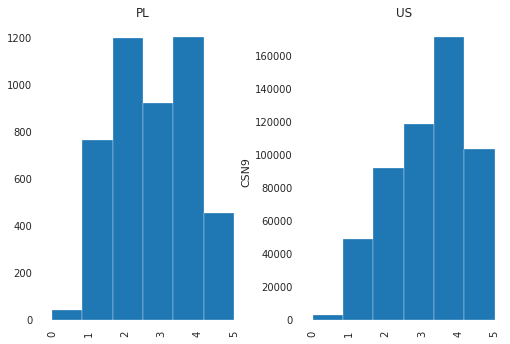

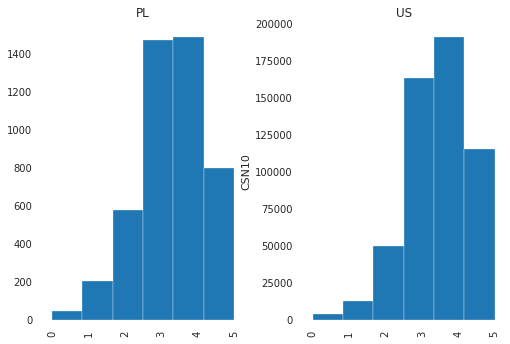

In [31]:
compare_answers(dataset_comp,30,40)

Results of comparison in category "Intellect or Imagination":
 
        OPN1	I have a rich vocabulary. - POLAND SCORED HIGHER
        OPN2	I have difficulty understanding abstract ideas. - USA SCORED HIGHER
        OPN3	I have a vivid imagination. - POLAND SCORED HIGHER
        OPN4	I am not interested in abstract ideas. - USA SCORED HIGHER
        OPN5	I have excellent ideas. - SIMILAR
        OPN6	I do not have a good imagination. - SIMILAR
        OPN7	I am quick to understand things. - POLAND SCORED HIGHER
        OPN8	I use difficult words. - POLAND SCORED HIGHER
        OPN9	I spend time reflecting on things. - POLAND SCORED HIGHER
        OPN10	I am full of ideas. - SIMILAR
        
In this category, Polish people seems to be more intellectual and they use their imagination more willingly.

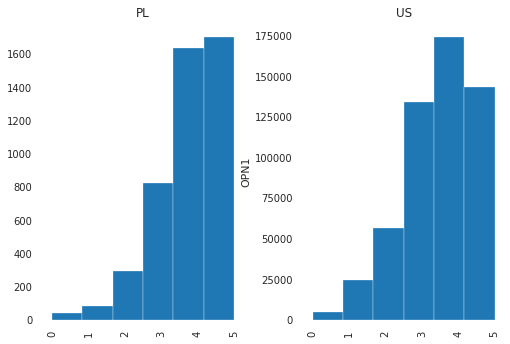

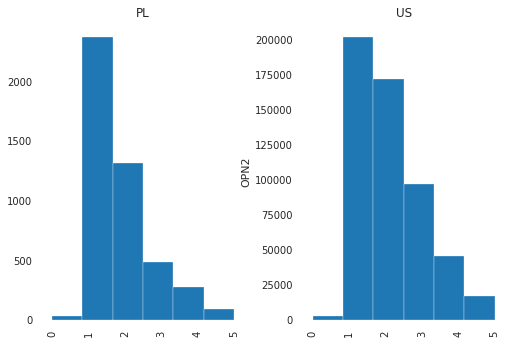

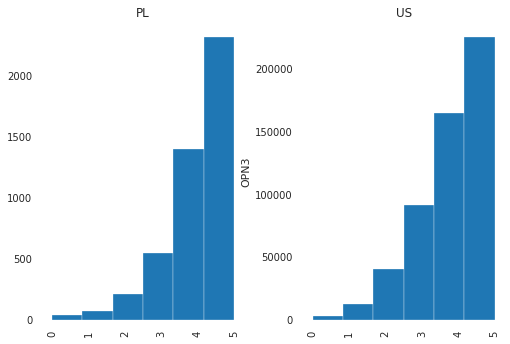

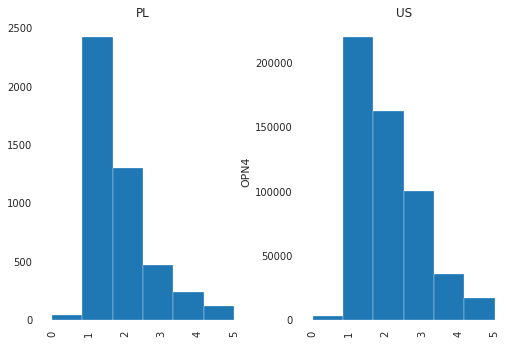

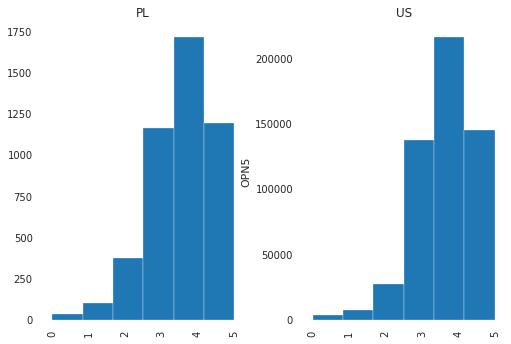

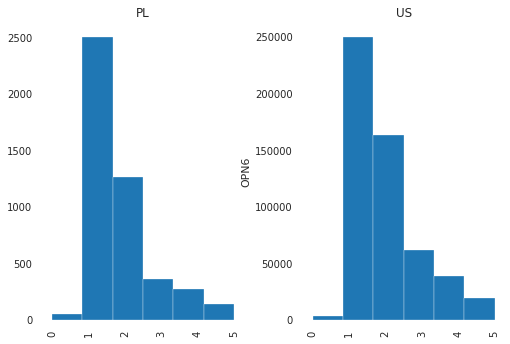

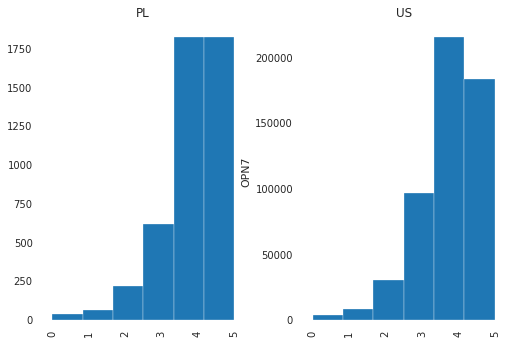

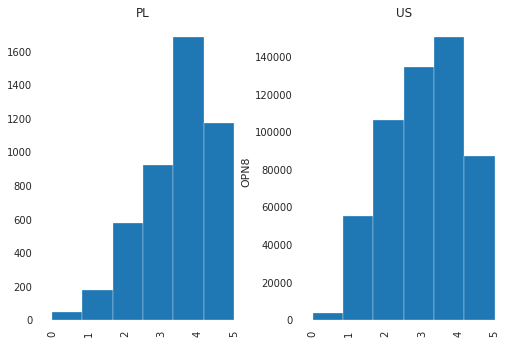

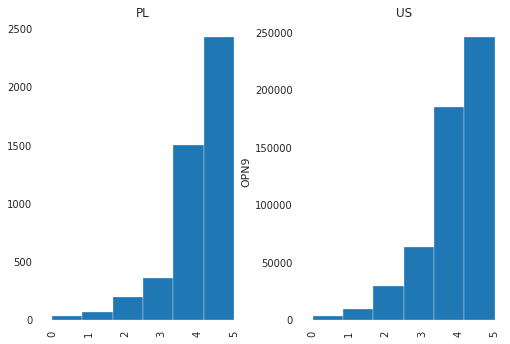

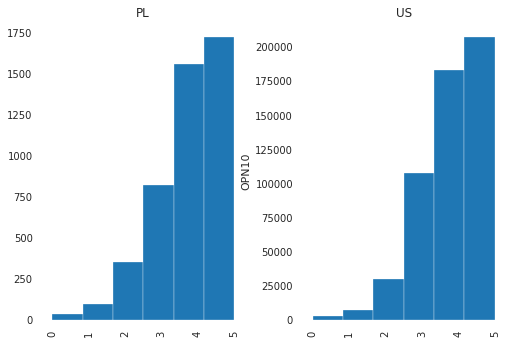

In [32]:
compare_answers(dataset_comp,40,50)

We found analogous results of research on this international comparsion topic. In this table, outcames from USA-Poland comparsion, are similar to our results.
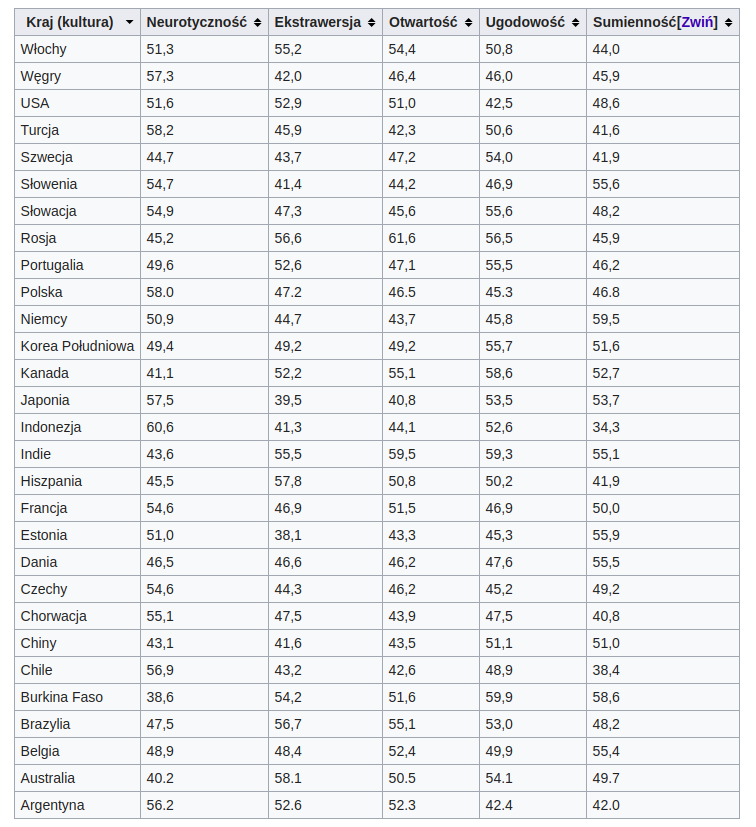

Below one more table. It displays all basic statistics for each question, grouped by country.

In [6]:
dataset_clean.groupby("country").describe(include='all')

EXT1                                                   EXT2  \
            count      mean       std  min  25%  50%  75%  max     count   
country                                                                    
AE         3007.0  2.836714  1.292131  0.0  2.0  3.0  4.0  5.0    3007.0   
AR         3073.0  2.488448  1.223394  0.0  1.0  3.0  3.0  5.0    3073.0   
AT         2176.0  2.525735  1.221749  0.0  1.0  3.0  3.0  5.0    2176.0   
AU        49024.0  2.670631  1.230346  0.0  2.0  3.0  4.0  5.0   49024.0   
BE         3756.0  2.706603  1.239677  0.0  2.0  3.0  4.0  5.0    3756.0   
BG         1257.0  2.581543  1.237000  0.0  1.0  3.0  4.0  5.0    1257.0   
BR         6157.0  2.212604  1.242567  0.0  1.0  2.0  3.0  5.0    6157.0   
CA        60905.0  2.647714  1.260509  0.0  2.0  3.0  4.0  5.0   60905.0   
CH         3079.0  2.649562  1.216477  0.0  2.0  3.0  4.0  5.0    3079.0   
CL         2148.0  2.525605  1.180021  0.0  1.0  3.0  3.0  5.0    2148.0   
CN         1316.0  2.509878  1.321041  0.0  1.0  3.0  3.0  5.0    1316.0   
CO         3532.0  2.701869  1.217621  0.0  2.0  3.0  3.0  5.0    3532.0   
CZ         1986.0  2.437059  1.247392  0.0  1.0  2.0  3.0  5.0    1986.0   
DE        13876.0  2.413808  1.208913  0.0  1.0  2.0  3.0  5.0   13876.0   
DK         5406.0  2.763226  1.203366  0.0  2.0  3.0  4.0  5.0    5406.0   
EC         1114.0  2.718133  1.156836  0.0  2.0  3.0  3.0  5.0    1114.0   
EE         1000.0  2.595000  1.291760  0.0  1.0  3.0  4.0  5.0    1000.0   
EG         1013.0  2.628825  1.351488  0.0  1.0  3.0  4.0  5.0    1013.0   
ES         4918.0  2.744205  1.250602  0.0  2.0  3.0  4.0  5.0    4918.0   
FI         4256.0  2.405310  1.212338  0.0  1.0  2.0  3.0  5.0    4256.0   
FR         6042.0  2.522509  1.250952  0.0  1.0  3.0  3.0  5.0    6042.0   
GB        65483.0  2.642106  1.244483  0.0  2.0  3.0  4.0  5.0   65483.0   
GR         2480.0  2.591532  1.203937  0.0  2.0  3.0  3.0  5.0    2480.0   
HK         3538.0  2.644715  1.191384  0.0  2.0  3.0  4.0  5.0    3538.0   
HR         2214.0  2.600723  1.241517  0.0  1.0  3.0  3.0  5.0    2214.0   
HU         1485.0  2.482155  1.245146  0.0  1.0  2.0  3.0  5.0    1485.0   
ID         6398.0  2.429978  1.259147  0.0  1.0  2.0  3.0  5.0    6398.0   
IE         5330.0  2.631707  1.217718  0.0  2.0  3.0  4.0  5.0    5330.0   
IL         1407.0  2.418621  1.203490  0.0  1.0  2.0  3.0  5.0    1407.0   
IN        17243.0  2.771154  1.384978  0.0  1.0  3.0  4.0  5.0   17243.0   
IT         5261.0  2.530317  1.249974  0.0  1.0  3.0  3.0  5.0    5261.0   
JP         1907.0  2.555847  1.222129  0.0  1.0  3.0  3.0  5.0    1907.0   
KE         1385.0  2.507581  1.373829  0.0  1.0  3.0  3.0  5.0    1385.0   
KR         1570.0  2.496815  1.258871  0.0  1.0  2.0  3.0  5.0    1570.0   
LT         1091.0  2.395050  1.254253  0.0  1.0  2.0  3.0  5.0    1091.0   
MX        10896.0  2.594805  1.200278  0.0  1.0  3.0  3.0  5.0   10896.0   
MY        11172.0  2.660132  1.217121  0.0  2.0  3.0  3.0  5.0   11172.0   
NL         9628.0  2.764333  1.222188  0.0  2.0  3.0  4.0  5.0    9628.0   
NO        10802.0  2.685614  1.189652  0.0  2.0  3.0  4.0  5.0   10802.0   
NZ        12795.0  2.744822  1.236332  0.0  2.0  3.0  4.0  5.0   12795.0   
OTHER     37764.0  2.572344  1.290820  0.0  1.0  3.0  3.0  5.0   37764.0   
PE         1620.0  2.712346  1.204263  0.0  2.0  3.0  3.0  5.0    1620.0   
PH        19550.0  2.529770  1.289617  0.0  1.0  3.0  3.0  5.0   19550.0   
PK         3457.0  2.918426  1.407548  0.0  2.0  3.0  4.0  5.0    3457.0   
PL         4591.0  2.323895  1.239805  0.0  1.0  2.0  3.0  5.0    4591.0   
PT         2476.0  2.396204  1.207439  0.0  1.0  2.0  3.0  5.0    2476.0   
RO         3792.0  2.569357  1.272413  0.0  1.0  3.0  4.0  5.0    3792.0   
RS         2038.0  2.568204  1.294606  0.0  1.0  3.0  4.0  5.0    2038.0   
RU         3281.0  2.365133  1.224318  0.0  1.0  2.0  3.0  5.0    3281.0   
SA         1084.0  2.545203  1.304437  0.0  1.0  3.0  3.0  5.